In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from datetime import datetime

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
healthy = pd.read_csv("/data/healthy.csv", header=None)
healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Columns: 646 entries, 0 to 645
dtypes: float64(646)
memory usage: 2.8 MB


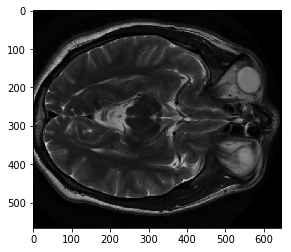

In [4]:
plt.imshow(healthy, cmap = "gray")

In [5]:
tumor = pd.read_csv("/data/tumor.csv", header=None)
tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Columns: 512 entries, 0 to 511
dtypes: float64(432), int64(80)
memory usage: 2.2 MB


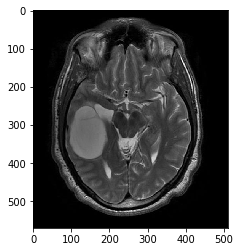

In [6]:
plt.imshow(tumor, cmap = "gray")

Inertia:  300.5942857100505
0    0.373330
1    0.076316
2    0.189057
3    0.051551
4    0.309745
dtype: float64
Time taken: 4 secs


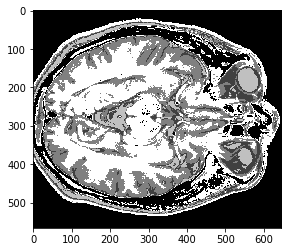

In [7]:
start_time = datetime.now()

km1 = KMeans(n_clusters=5,n_init=10, init="k-means++")
y = km1.fit_predict(healthy.values.reshape(-1, 1))
plt.imshow(y.reshape(566, 646), cmap = "gray", interpolation="nearest")
print("Inertia: ", km1.inertia_)
print((pd.Series(y).value_counts() / y.shape[0]).sort_index())

print("Time taken: %d secs" %(datetime.now() - start_time).seconds)


Inertia:  294.2691208784608
0    0.476911
1    0.184514
2    0.104118
3    0.029598
4    0.204859
dtype: float64
Time taken: 2 secs


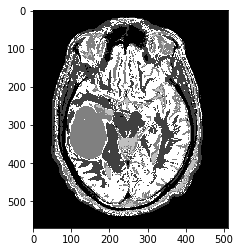

In [8]:
start_time = datetime.now()

km2 = KMeans(n_clusters=5,n_init=10, init="k-means++")
y = km2.fit_predict(tumor.values.reshape(-1, 1))
plt.imshow(y.reshape(tumor.shape[0], tumor.shape[1]), cmap = "gray", interpolation="nearest")
print("Inertia: ", km2.inertia_)
print((pd.Series(y).value_counts() / y.shape[0]).sort_index())

print("Time taken: %d secs" %(datetime.now() - start_time).seconds)

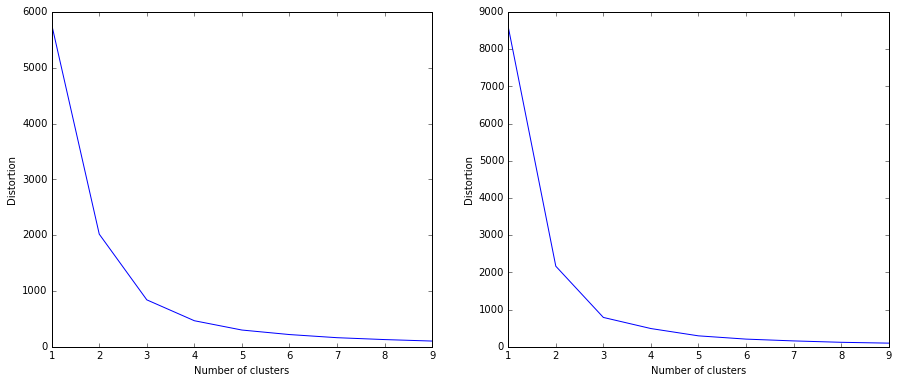

In [9]:
def find_elbow(X, n = 10):
    distortions = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0, init="k-means++")
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1, n), distortions)
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
find_elbow(healthy.values.reshape(-1, 1))
plt.subplot(1, 2, 2)
find_elbow(tumor.values.reshape(-1, 1))

In [73]:
566 * 646 / 33


11079.878787878788